# Modelowanie szeregów  czasowych  z autokorelacją

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from ts_utils import check_time_series_stationary
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationary(y, rolling_len = 12):
    
    y = pd.Series(y)
    
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    pd.plotting.autocorrelation_plot(y)
    plt.show()

## Graficzna analiza przebiegu funkcji ACF i PACF

- jeśli autokorelacja próbkowa $\text{ACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > q$, to spodziewamy się, że dane są realizacją procesu $\text{MA}(q)$;
- jeśli cząstkowa autokorelacja próbkowa $\text{PACF}(h)$ znajduje się pomiędzy przedziałami ufności $\pm 1,96 \sqrt{n}$ dla $h > p$, to spodziewamy się, że dane są realizacją procesu $\text{AR}(p)$;

## Model średniej ruchomej - $\text{MA}(q)$

**Modelem średniej ruchomej rzędu $q$** nazywamy stacjonarny szereg $Y_t$ spełniający równanie:
$$Y_t = \mu+ \varepsilon_t + \sum_{i=1}^q \theta_i\cdot \varepsilon_{t-i},$$
gdzie $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model MA(1)

Wygeneruj 100 elementowy szereg MA(1): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1}$. Następnie sporządź wykresy ACF i PACF (`plot_acf` i `plot_pacf` z `statsmodels.graphics.tsaplots`).

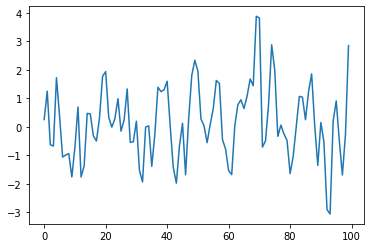

In [ ]:
#ustalmy wspólną wersję
np.random.seed(128)
#generacja danych z procesu MA(1)
N = 101
e = np.random.normal(0,1,N)
ma1 = np.array([e[i]+0.9*e[i-1] for i in range(1,N)])
plt.plot(ma1)
plt.show()

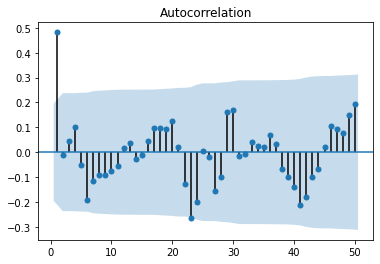

In [ ]:
plot_acf(ma1,lags = 50,zero = False) #charakterystyczna rzecz - w MA(1) wystaje poza pas pierwsza autokorelacja, 
#ogólnie jeśli jakaś kreska wystaje poza pas (patrzymy na pierwsze \sqrt(len(szereg)) autokorelacji dla len(szereg)>=100 i len(szereg)/4 pierwszych autokorealcji dla szeregów o liczności len(szereg)<100))
#to modelujemy dane za pomocą modelu MA(q) gdzie q to indeks ostatniej wystającej kreski autokorelacji z tych które rozpatrujemy
plt.show()

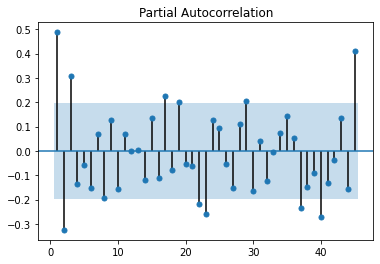

In [ ]:
plot_pacf(ma1,lags = 45, zero= False) #mamy też wykres pacfów (to są acf tylko przy założeniu, że obserwacje między Y_t i Y_{t+h} nie wpływają liniowo na Y_t i  Y_{t+h}), będziemy tego używać do modelowania modelami AR
plt.show()


## Zadanie - model MA(2)
Wygeneruj 100 elementowy szereg MA(2): $Y_t = \varepsilon_t + 0.9 \cdot \varepsilon_{t-1} + 0.7 * \varepsilon_{t-2}$.

In [ ]:
np.random.seed(128)
N2 = 102
e2 = np.random.normal(0,1,N2)
ma2=np.array([e2[i]+0.9*e2[i-1]+0.7*e2[i-2] for i in range(2,N2)])
print(ma2)

[ 0.97560038 -0.19134991 -0.17998461  0.85116804  0.71397876 -0.13580668
 -1.53732494 -1.17667402 -2.22519529 -0.94381971 -0.31910301 -1.33697713
 -1.25677527 -0.85401373  0.69647845 -0.1932956  -0.27939268 -0.08835469
  1.80283293  2.14530039  1.40471763  0.39649654  0.16616744  1.09848795
 -0.04045204  0.83947195  0.6922042   0.20454035 -0.25865916 -0.41451728
 -1.33928651 -1.95785716 -1.04795923 -0.37133613 -1.01446841 -0.55782721
  0.69885163  1.68640414  1.87719692  1.9556662   0.62378608 -0.84016769
 -2.48058844 -1.20748265 -0.7655262  -1.34063275  0.06758621  0.81847202
  3.42191611  2.24800293  1.66121     0.16845505 -0.47139827  0.04208415
  0.30009661  2.00211961  1.64176998  0.5895125  -0.63827801 -1.96789979
 -1.82299123 -0.89778362  0.45097546  1.2758186   0.90078006  1.51861434
  1.74152731  2.15055036  4.42987475  4.34428144  1.54314504  0.16397594
 -0.27164844  3.51439073  1.99420236  1.69063831 -0.35491963 -0.09883955
 -0.56050428 -1.72971653 -1.27840049 -0.90744007  1

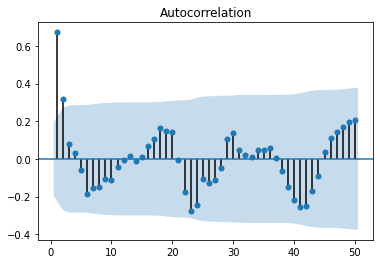

In [ ]:
plot_acf(ma2,lags = 50,zero = False)
plt.show() #wystają dwie kreski - model MA(2) adekwatny do tych danych (nic dziwnego skoro dane są wygenerowane z tego modelu)

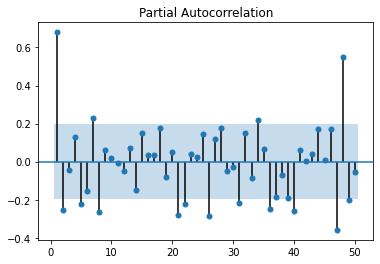

In [ ]:
plot_pacf(ma2,lags = 50,zero = False) #wykres pacfów
plt.show()

## Model autoregresji rzędu $p$ - $\text{AR}(p)$

**Modelem autoregresji rzędu $p$** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model AR(1) 

Wygeneruj 100 elementowy szereg AR(1): $Y_t = 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

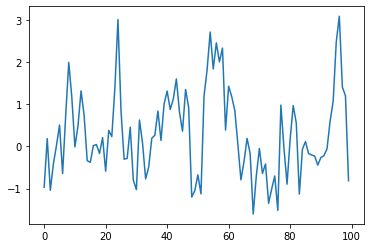

In [ ]:
#szereg z procesu AR(1), nie rozpatrujemy pierwszych 100 obserwacji, aby pozbyć się wpływu punktu początkowego (musimy od jakiegoś zacząć bo w teorii AR idzie od czsu t = -oo do t = oo)
np.random.seed(128)
N = 201
e = np.random.normal(0,1,N)
ar1 = np.zeros(N)
for i in range(1,N):
  ar1[i] = 0.8*ar1[i-1]+e[i]
ar1 = ar1[101:]
plt.plot(ar1)
plt.show()

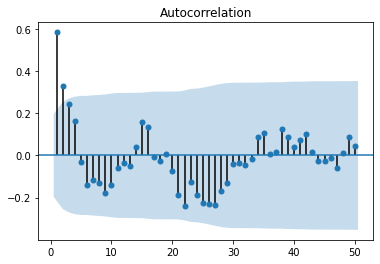

In [ ]:
plot_acf(ar1,lags = 50,zero = False)
plt.show()
# gdyby patrzeć na ACF to powiedzielibyśmy, że MA(2)

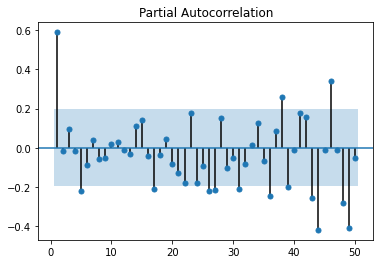

In [ ]:
plot_pacf(ar1,lags = 50,zero = False)
plt.show()
#patrząc na pacfy zdecydowanie AR(1)
#często łaczy się obseracje z acfów i pacfów i tak możnaby te dane modelować procesem ARMA(1,3)

## Zadanie - model AR(2) 

Wygeneruj 100 elementowy szereg AR(2): $Y_t = 0.7\cdot Y_{t-2} + 0.8\cdot Y_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

<function matplotlib.pyplot.show>

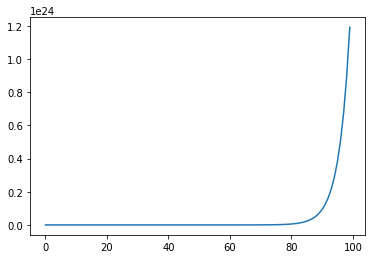

In [ ]:
np.random.seed(128)
N2 = 201
e2 = np.random.normal(0,1,N2)
ar2 = np.zeros(N2)
for i in range(1,N2):
    ar2[i] = 0.7*ar2[i-2]+ 0.8*ar2[i-1] + e[i]
ar2 = ar2[101:]
plt.plot(ar2)
plt.show
#proces jest niestacjonarny!!! przy innych współczynnikach może być

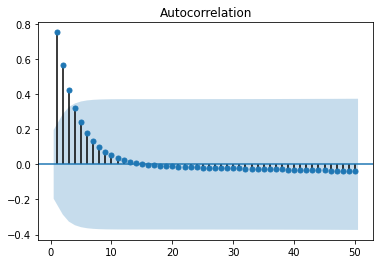

In [ ]:
plot_acf(ar2,lags = 50,zero = False)
plt.show()

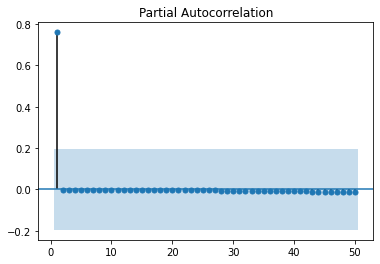

In [ ]:
plot_pacf(ar2,lags = 50,zero = False)
plt.show() #acf i pacf pokazują że w porządku nie jest

## Model autoregresji ruchomej średniej - $\text{ARMA}(p, q)$

**Modelem autoregresji ruchomej średniej** nazywamy stacjonarny szereg czasowy $Y_t$ spełniający równanie:
$$Y_t = \mu+\sum_{i=1}^p \phi_i\cdot Y_{t-i} + \sum_{j=1}^q \theta_j \cdot \varepsilon_{t-j} + \varepsilon_t,$$
gdzie $\phi_1, \phi_2, \ldots, \phi_p$ oraz  $\theta_1, \theta_2, \ldots, \theta_{q}$ są współczynnikami modelu oraz $\varepsilon_t$ to biały szum.

## Zadanie - model ARMA(1, 1)
Wygeneruj 100 elementowy szereg ARMA(1, 1): $Y_t = 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

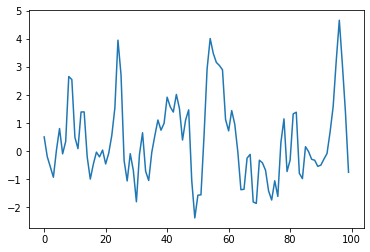

In [ ]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arma = 10*np.ones(N5)
for i in range(1,N5):
    arma[i] = 0.7*arma[i-1]+0.8*e[i-1]+e[i]
arma = arma[101:]
plt.plot(arma)
plt.show()

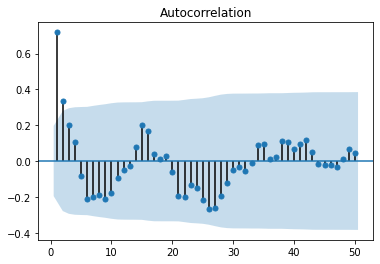

In [ ]:
plot_acf(arma,lags = 50,zero = False)
plt.show() #MA(2)

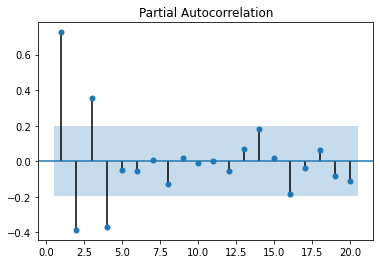

In [ ]:
plot_pacf(arma,lags = 20,zero = False)
plt.show() #AR(4)

In [ ]:
ar2 = ARIMA(endog=arma, order=(4, 0, 2)) #z obserwacji mamy ARMA(4,2)
ar2 = ar2.fit()

In [ ]:
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(4, 2)   Log Likelihood                -119.861
Method:                       css-mle   S.D. of innovations              0.792
Date:                Tue, 28 Jun 2022   AIC                            255.723
Time:                        15:44:27   BIC                            276.564
Sample:                             0   HQIC                           264.158
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3696      0.183      2.018      0.047       0.011       0.729
ar.L1.y        1.3514      0.215      6.300      0.000       0.931       1.772
ar.L2.y       -0.7345      0.308     -2.384      0.019      -1.338      -0.131
ar.L3.y        0.4481      0.287      1.561      0.122      -0.114       1.011
ar.L4.y       -0.2792      0.142     -1.961      0.053      -0.558      -0.000
ma.L1.y       -0.0164      0.223     -0.073      0.942      -0.454       0.421
ma.L2.y       -0.4973      0.243     -2.046      0.044      -0.974      -0.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1045           -0.4157j            1.1802           -0.0573
AR.2            1.1045           +0.4157j            1.1802            0.0573
AR.3           -0.3019           -1.5751j            1.6037           -0.2801
AR.4           -0.3019           +1.5751j            1.6037            0.2801
MA.1            1.4017           +0.0000j            1.4017            0.0000
MA.2           -1.4347           +0.0000j            1.4347            0.5000
-----------------------------------------------------------------------------
"""

## Zadanie - model ARMA(2, 1)
Wygeneruj 100 elementowy szereg ARMA(1, 1): $Y_t = 0.5\cdot Y_{t-2} + 0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.

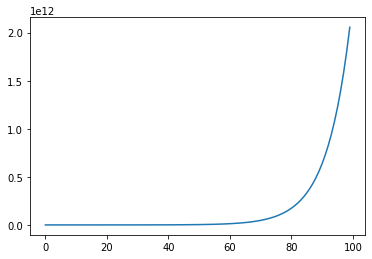

In [ ]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arma = 10*np.ones(N5)
for i in range(1,N5):
    arma[i] = 0.7*arma[i-1]+0.5*arma[i-2]+0.8*e[i-1]+e[i]
arma = arma[101:]
plt.plot(arma)
plt.show()
#niestacjonarny wynika to z niestacjonarności części AR

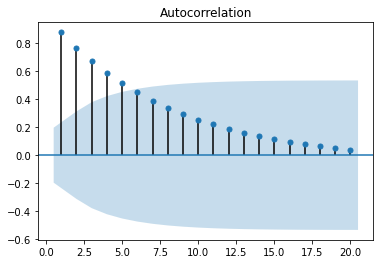

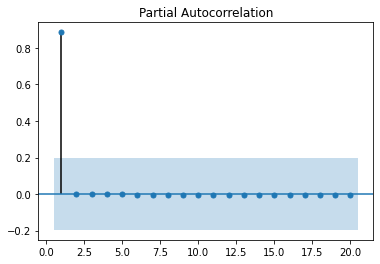

In [ ]:
plot_acf(arma,lags = 20,zero = False)
plot_pacf(arma,lags = 20,zero = False)
plt.show() #zdecydowanie niestacjonarny

## Zadanie - szereg z trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$. Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

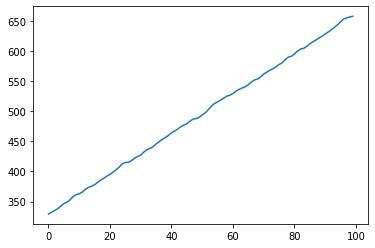

In [ ]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arima = 10*np.ones(N5)
for i in range(1,N5):
    arima[i] = i+0.7*arima[i-1]+0.8*e[i-1]+e[i]
arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend

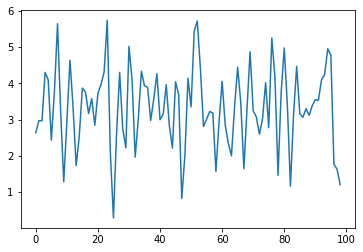

In [ ]:
arima_diff = arima[1:]-arima[:(len(arima)-1)]
plt.plot(arima_diff)
plt.show() #patrzymy na szereg zróżnicowany, jest on stacjonarny

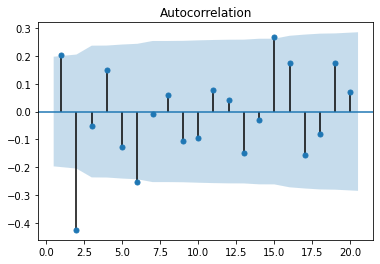

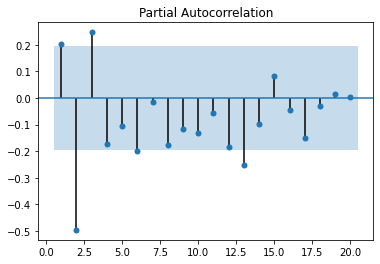

In [ ]:
plot_acf(arima_diff,lags = 20,zero = False)
plot_pacf(arima_diff,lags = 20,zero = False)
plt.show() #ARMA(3,2) na zróżnicowanym

In [ ]:
#ARMA(3,2) na zróżnicowanym to to samo co ARIMA(3,1,2) na wyjściowym. środkowy wyraz oznacza jak przerabiamy szereg wyjściowy do tego na którym budujemy model ARMA
#np. dla 1 mamy budowanie ARMA dla szeregu Y_t-Y_{t-1}, dla 2 na szeregu Y_t-Y_{t-1}-Y_{t-2} itd., ważne że predykcje dla ARIMY są robione dla szeregu wyjściowego.
m1 = ARIMA(endog=arima_diff, order=(3, 0, 2)).fit()
m2 = ARIMA(endog=arima, order=(3, 1, 2)).fit()
print(m1.summary())
print(m2.summary())
#jak widzimy współczynniki w obydwu szeregach jednakowe

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   99
Model:                     ARMA(3, 2)   Log Likelihood                -122.176
Method:                       css-mle   S.D. of innovations              0.814
Date:                Tue, 28 Jun 2022   AIC                            258.352
Time:                        15:46:07   BIC                            276.518
Sample:                             0   HQIC                           265.702
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3303      0.010    321.502      0.000       3.310       3.351
ar.L1.y        0.5636      0.141      4.004      0.000       0.288       0.839
ar.L2.y       -0.1498      0.170     -0.882      0.3

## Zadanie - szereg z sezonem i trendem
Wygeneruj 100 elementowy szereg: $Y_t = t+t$	mod $12 +0.7\cdot Y_{t-1} + 0.8\cdot \varepsilon_{t-1} + \varepsilon_t$.
gdzie $t$ mod $12$ oznacza dzielenie modulo (resztę z dzielenia) $t$ przez $12$.
Następnie sporządź wykresy ACF i PACF.
Zamodeluj szereg na podstawie analizy ACF i PACF.

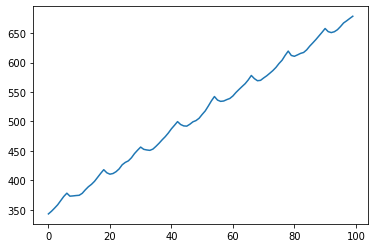

In [4]:
np.random.seed(128)
N5 = 201
e = np.random.normal(0,1,N5)
arima = 10*np.ones(N5)
for i in range(1,N5):
    arima[i] = i+i%12+0.7*arima[i-1]+0.8*e[i-1]+e[i]
arima = arima[101:]
plt.plot(arima)
plt.show() #jest trend i sezonowość

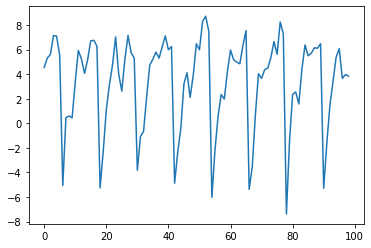

In [5]:
#różnicujemy w celu pozbycia się trendu
arima_diff = arima[1:]-arima[:(len(arima)-1)]
plt.plot(arima_diff)
plt.show() #patrzymy na szereg zróżnicowany, ale jest sezonowość

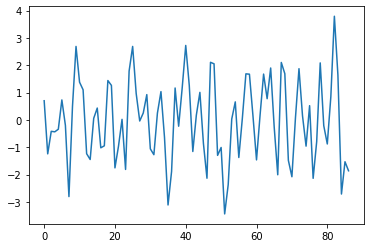

In [6]:
#różnicujemy o 12 celem pozbysia się sezonowości
arima_diff_12 = arima_diff[12:]-arima_diff[:(len(arima_diff)-12)]
plt.plot(arima_diff_12)
plt.show() #jest stacjonarny

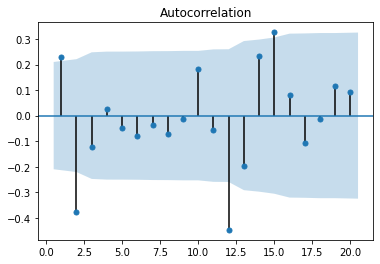

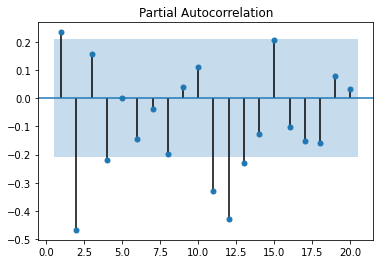

In [7]:
#analiza pacfów i acfów
plot_acf(arima_diff_12,lags = 20,zero = False)
plot_pacf(arima_diff_12,lags = 20,zero = False)
plt.show() #ARMA(4,2) na zróżnicowanym i bez sezonu

In [8]:
#modelujemy szereg bez trendu i sezonu
m1 = ARIMA(endog=arima_diff_12, order=(4, 0, 2)).fit()
#lub szereg wyjściowy. Potrzebujemy do tego funkcji sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
m2 = SARIMAX(endog=arima, order=(4, 1, 2),seasonal_order = (0,1,0,12), trend='c').fit() # środkowa 1 w order sprawia, że pracujemy na szeregu V_t = y_t-Y_{t-1}, a 1 w seasonal_order sprawia, że ostatecznie mamy  Z_t = V_t -V_{t_12} 
#i na tym ostatnim dopasowujemy model ARMA(4,2), gdyby seasonal_order miał 2 zamiast 1 rozpatrywalibyśmy V_t -V_{t_12}-V_{t-24}, 12 jako ostatni argument, mówi nam co ile powtrzają się wyniki w sezonie
#wartość 'c' w trend oznacza, że chcemy model ze średnią (\mu opisywaną w summary jako intercept)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
print(m1.summary())
print(m2.summary())
#jak widzimy współczynniki w obydwu szeregach podobne (to, że nie są takie same wynika z nieco innych algorytmów wyliczania współczynników) użycie sarimaxa sprawia, że możemy mieć prognozy bezpośrednio dla szeregu wyjściowego

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   87
Model:                     ARMA(4, 2)   Log Likelihood                -136.260
Method:                       css-mle   S.D. of innovations              1.115
Date:                Wed, 29 Jun 2022   AIC                            288.519
Time:                        12:10:57   BIC                            308.247
Sample:                             0   HQIC                           296.463
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.019      0.247      0.806      -0.032       0.041
ar.L1.y        0.4124      0.109      3.772      0.000       0.198       0.627
ar.L2.y        0.1247      0.119      1.047      0.2